In [1]:
%load_ext lab_black

In [10]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [11]:
A = [list(r) for r in Path("data/12.txt").read_text().splitlines()]

start, end = None, None

for ri in range(len(A)):
    if "S" in A[ri]:
        ci = A[ri].index("S")
        start = (ri, ci)
        A[ri][ci] = "a"
    if "E" in A[ri]:
        ci = A[ri].index("E")
        end = (ri, ci)
        A[ri][ci] = "z"

A = np.array([[ord(c) - 96 for c in r] for r in A])

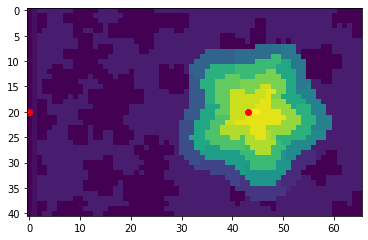

In [15]:
plt.imshow(A)
plt.scatter([start[1]], [start[0]], c="r")
plt.scatter([end[1]], [end[0]], c="r")

In [26]:
from typing import Tuple, List

Location = Tuple


class Graph:
    def __init__(self, array: np.ndarray):
        self._A = array
        self._nbs = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])

    def neighbors(self, y, x) -> List[Location]:
        nbs = []
        for yn, xn in self._nbs:
            yc, xc = yn + y, xn + x
            if yc < 0 or yc >= self._A.shape[0]:
                continue
            if xc < 0 or xc >= self._A.shape[1]:
                continue
            if abs(self._A[yc, xc] - self._A[y, x]) > 1:
                continue
            nbs.append(((yc, xc), self._A[yc, xc]))
        return nbs

In [27]:
from collections import deque

In [28]:
frontier = deque()

In [30]:
frontier.put(start, 0)
came_from = {}
cost_so_far = {}

AttributeError: 'collections.deque' object has no attribute 'put'

In [ ]:
came_from[start] = None
cost_so_far[start] = 0

while not frontier.empty():
   current = frontier.get()

   if current == goal:
      break
   
   for next in graph.neighbors(current):
      new_cost = cost_so_far[current] + graph.cost(current, next)
      if next not in cost_so_far or new_cost < cost_so_far[next]:
         cost_so_far[next] = new_cost
         priority = new_cost
         frontier.put(next, priority)
         came_from[next] = current